In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc

from scipy.stats import sem, t
from scipy import mean


In [2]:
df_CPU = pd.read_csv('../resultado2_CPU.txt', sep=',')
#df_CPU = df_CPU.mean()
df_CPU

,1 - 100 x 100,1 - 1000 x 1000,1 - 10000 x 10000,2 - 100 x 100,2 - 1000 x 1000,2 - 10000 x 10000,4 - 100 x 100,4 - 1000 x 1000,4 - 10000 x 10000,8 - 100 x 100,...,256 - 10000 x 10000,512 - 100 x 100,512 - 1000 x 1000,512 - 10000 x 10000,1024 - 100 x 100,1024 - 1000 x 1000,1024 - 10000 x 10000,2048 - 100 x 100,2048 - 1000 x 1000,2048 - 10000 x 10000
0,0.0225,2.1279,210.2732,0.0130,1.1001,108.3367,0.0183,1.0171,101.1612,0.0121,...,94.4873,0.0266,0.9726,94.5267,0.0439,0.9956,94.6769,0.0650,1.0162,94.5426
1,0.0223,2.1347,210.3144,0.0129,1.1008,108.2511,0.0183,1.0188,99.0975,0.0121,...,94.3253,0.0269,0.9738,94.4449,0.0404,0.9886,94.3610,0.0673,1.0127,94.4530
2,0.0228,2.1340,210.1515,0.0133,1.1022,108.1660,0.0166,1.0286,101.1433,0.0127,...,94.2511,0.0264,0.9765,94.4702,0.0417,0.9918,94.2864,0.0697,1.0204,94.5877
3,0.0228,2.1258,209.6660,0.0128,1.1164,108.0502,0.0134,1.0176,99.4142,0.0135,...,94.4744,0.0274,0.9749,94.1883,0.0414,0.9892,94.2894,0.0712,1.0151,94.5431
4,0.0221,2.1175,211.7580,0.0129,1.0993,108.8620,0.0173,1.0307,99.8196,0.0135,...,94.4796,0.0260,0.9745,94.2624,0.0402,0.9880,94.2621,0.0717,1.0207,94.5334
5,0.0222,2.1296,210.8994,0.0128,1.0973,107.8604,0.0184,1.0223,101.3146,0.0124,...,94.5497,0.0263,0.9755,94.2213,0.0403,0.9893,94.2261,0.0661,1.0170,94.5390
6,0.0222,2.1208,210.8531,0.0132,1.1019,108.3773,0.0168,1.0287,99.3418,0.0133,...,94.4671,0.0255,0.9742,94.2570,0.0370,0.9872,94.2657,0.0714,1.0167,94.5321
7,0.0222,2.1215,210.3388,0.0128,1.0976,108.0055,0.0183,1.0208,101.2368,0.0130,...,94.4854,0.0266,0.9743,94.2602,0.0402,0.9878,94.2802,0.0706,1.0216,94.5303
8,0.0222,2.1219,210.4947,0.0133,1.0952,107.9365,0.0166,1.0343,99.6043,0.0127,...,94.4688,0.0273,0.9776,94.2013,0.0397,0.9868,94.2638,0.0697,1.0208,94.5357
9,0.0228,2.1262,212.0728,0.0128,1.1059,108.2915,0.0130,1.0134,101.2287,0.0122,...,94.4674,0.0278,0.9771,94.3388,0.0413,0.9885,94.2894,0.0712,1.0151,94.5431


In [3]:
df_GPU = pd.read_csv('../resultado2_GPU.txt', sep=',')
#df_CPU = df_CPU.mean()
df_GPU

,1 - 100 x 100,1 - 1000 x 1000,1 - 10000 x 10000,2 - 100 x 100,2 - 1000 x 1000,2 - 10000 x 10000,4 - 100 x 100,4 - 1000 x 1000,4 - 10000 x 10000,8 - 100 x 100,...,256 - 10000 x 10000,512 - 100 x 100,512 - 1000 x 1000,512 - 10000 x 10000,1024 - 100 x 100,1024 - 1000 x 1000,1024 - 10000 x 10000,2048 - 100 x 100,2048 - 1000 x 1000,2048 - 10000 x 10000
0,2.2236,2.3202,10.3193,2.6596,2.4047,9.2502,2.4871,2.2949,8.6519,2.6778,...,8.1407,2.6436,2.2826,8.5685,2.2094,2.3065,8.1498,2.1962,2.2673,8.2012
1,2.2051,2.3446,10.8806,2.2024,2.2902,9.2090,2.5489,2.2948,8.6632,2.2027,...,8.1175,2.1957,2.2660,8.5503,2.6475,2.2767,8.4422,2.1992,2.2629,7.7519
2,2.2411,2.2946,10.3066,2.1996,2.3088,9.7856,2.2093,2.2901,8.6360,2.2077,...,8.1022,2.1924,2.2830,8.5539,2.1923,2.2935,8.4244,2.5668,2.7098,7.7112
3,2.2047,2.3002,10.2936,2.6279,2.2914,9.2202,2.2258,2.7295,8.6568,2.6485,...,8.1250,2.2051,2.2798,8.5456,2.5905,2.7203,8.5702,2.2062,2.2668,7.7168
4,2.2034,2.7419,10.3162,2.2180,2.7225,9.1899,2.6544,2.7196,8.6467,2.2041,...,8.1512,2.6402,2.2890,8.5883,2.6351,2.2836,8.5548,2.2104,2.2643,7.7185
5,2.2084,2.3008,10.3192,2.1862,2.7378,9.1868,2.1890,2.2699,8.6580,2.1951,...,8.5553,2.2018,2.2789,8.5456,2.6362,2.6735,8.1193,2.2971,2.2563,7.7458
6,2.2035,2.2934,10.3313,2.6336,2.7208,9.2404,2.2041,2.7125,8.6311,2.2023,...,8.1035,2.2066,2.2737,8.1383,2.2177,2.7098,8.1062,2.1951,2.2512,7.7446
7,2.6404,2.3027,10.8290,2.6298,2.2877,9.1864,2.6354,2.2813,9.1954,2.2925,...,8.5341,2.2051,2.2713,8.1274,2.2168,2.2679,8.1239,2.2047,2.2574,8.1587
8,2.6460,2.2939,10.8961,2.6351,2.2804,9.1966,2.1959,2.2988,8.6428,2.2030,...,8.1105,2.6423,2.2752,8.1399,2.2053,2.2762,8.0979,2.1899,2.2618,7.7269
9,2.2022,2.2940,10.3074,2.2006,2.2914,9.7966,2.1939,2.2859,8.6415,2.6425,...,8.1230,2.6409,2.2741,8.5780,2.2138,2.7247,8.5548,2.2104,2.2643,7.7185


In [4]:
def confidence_interval(data):
    confidence = 0.99

    n = len(data)
    m = mean(data)
    std_err = sem(data)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)

    return h

In [5]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

def plotGraph(df_CPU, df_GPU, title):
    threads = np.array(['1','2','4','8','16','32','64','128','256','512','1024','2048'])

    mean0 = df_CPU.mean().values
    ub0 = mean0 + df_CPU.apply(confidence_interval).values
    lb0 = mean0 - df_CPU.apply(confidence_interval).values

    mean1 = df_GPU.mean().values
    ub1 = mean1 + df_GPU.apply(confidence_interval).values
    lb1 = mean1 - df_GPU.apply(confidence_interval).values

    # plot the data
    fig = plt.figure(1, figsize=(10, 4))
    plot_mean_and_CI(mean0, ub0, lb0, color_mean='k', color_shading='k')
    plot_mean_and_CI(mean1, ub1, lb1, color_mean='k--', color_shading='k')

    bg = np.array([1, 1, 1])  # background of the legend is white
    colors = ['black', 'gray', 'green']
    # with alpha = .5, the faded color is the average of the background and color
    colors_faded = [(np.array(cc.to_rgb(color)) + bg) / 2.0 for color in colors]

    plt.legend([0, 1], ['CPU', 'GPU'],
               handler_map={
                   0: LegendObject(colors[0], colors_faded[0]),
                   1: LegendObject(colors[1], colors_faded[1], dashed=True),
                })

    plt.xticks(range(len(threads)), threads)
    plt.xlabel('threads')
    plt.ylabel('tempo (s)')
    plt.title(title)
    plt.tight_layout()
    plt.grid()
 
class LegendObject(object):
    def __init__(self, facecolor='red', edgecolor='white', dashed=False):
        self.facecolor = facecolor
        self.edgecolor = edgecolor
        self.dashed = dashed
 
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle(
            # create a rectangle that is filled with color
            [x0, y0], width, height, facecolor=self.facecolor,
            # and whose edges are the faded color
            edgecolor=self.edgecolor, lw=3)
        handlebox.add_artist(patch)
 
        # if we're creating the legend for a dashed line,
        # manually add the dash in to our rectangle
        if self.dashed:
            patch1 = mpatches.Rectangle(
                [x0 + 2*width/5, y0], width/5, height, facecolor=self.edgecolor,
                transform=handlebox.get_transform())
            handlebox.add_artist(patch1)
 
        return patch
 


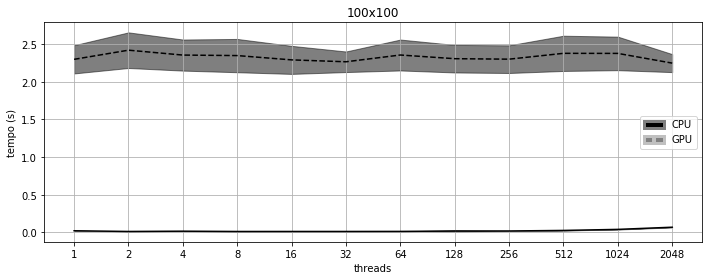

In [6]:
df_CPU_1 = df_CPU[['1 - 100 x 100','2 - 100 x 100','4 - 100 x 100','8 - 100 x 100','16 - 100 x 100','32 - 100 x 100','64 - 100 x 100','128 - 100 x 100','256 - 100 x 100','512 - 100 x 100','1024 - 100 x 100','2048 - 100 x 100']]
df_CPU_1 = df_CPU_1.copy().rename(columns={'1 - 100 x 100':'1','2 - 100 x 100':'2','4 - 100 x 100':'4','8 - 100 x 100':'8','16 - 100 x 100':'16','32 - 100 x 100':'32','64 - 100 x 100':'64','128 - 100 x 100':'128','256 - 100 x 100':'256','512 - 100 x 100':'512','1024 - 100 x 100':'1024','2048 - 100 x 100':'2048'})

df_GPU_1 = df_GPU[['1 - 100 x 100','2 - 100 x 100','4 - 100 x 100','8 - 100 x 100','16 - 100 x 100','32 - 100 x 100','64 - 100 x 100','128 - 100 x 100','256 - 100 x 100','512 - 100 x 100','1024 - 100 x 100','2048 - 100 x 100']]
df_GPU_1 = df_GPU_1.copy().rename(columns={'1 - 100 x 100':'1','2 - 100 x 100':'2','4 - 100 x 100':'4','8 - 100 x 100':'8','16 - 100 x 100':'16','32 - 100 x 100':'32','64 - 100 x 100':'64','128 - 100 x 100':'128','256 - 100 x 100':'256','512 - 100 x 100':'512','1024 - 100 x 100':'1024','2048 - 100 x 100':'2048'})


plotGraph(df_CPU_1, df_GPU_1, '100x100')

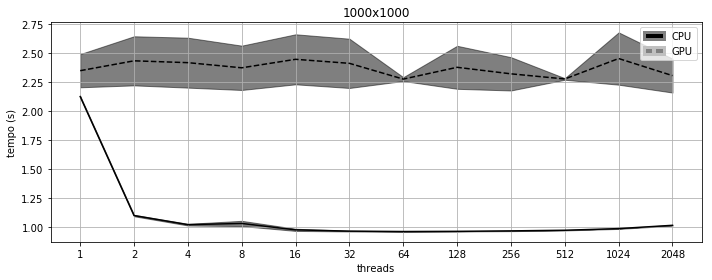

In [7]:
df_CPU_1 = df_CPU[['1 - 1000 x 1000','2 - 1000 x 1000','4 - 1000 x 1000','8 - 1000 x 1000','16 - 1000 x 1000','32 - 1000 x 1000','64 - 1000 x 1000','128 - 1000 x 1000','256 - 1000 x 1000','512 - 1000 x 1000','1024 - 1000 x 1000','2048 - 1000 x 1000']]
df_CPU_1 = df_CPU_1.copy().rename(columns={'1 - 1000 x 1000':'1','2 - 1000 x 1000':'2','4 - 1000 x 1000':'4','8 - 1000 x 1000':'8','16 - 1000 x 1000':'16','32 - 1000 x 1000':'32','64 - 1000 x 1000':'64','128 - 1000 x 1000':'128','256 - 1000 x 1000':'256','512 - 1000 x 1000':'512','1024 - 1000 x 1000':'1024','2048 - 1000 x 1000':'2048'})

df_GPU_1 = df_GPU[['1 - 1000 x 1000','2 - 1000 x 1000','4 - 1000 x 1000','8 - 1000 x 1000','16 - 1000 x 1000','32 - 1000 x 1000','64 - 1000 x 1000','128 - 1000 x 1000','256 - 1000 x 1000','512 - 1000 x 1000','1024 - 1000 x 1000','2048 - 1000 x 1000']]
df_GPU_1 = df_GPU_1.copy().rename(columns={'1 - 1000 x 1000':'1','2 - 1000 x 1000':'2','4 - 1000 x 1000':'4','8 - 1000 x 1000':'8','16 - 1000 x 1000':'16','32 - 1000 x 1000':'32','64 - 1000 x 1000':'64','128 - 1000 x 1000':'128','256 - 1000 x 1000':'256','512 - 1000 x 1000':'512','1024 - 1000 x 1000':'1024','2048 - 1000 x 1000':'2048'})


plotGraph(df_CPU_1, df_GPU_1, '1000x1000')

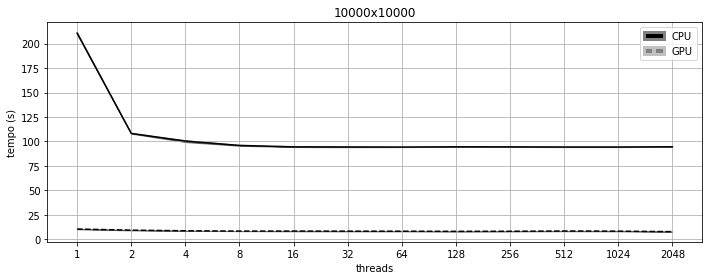

In [8]:
df_CPU_1 = df_CPU[['1 - 10000 x 10000','2 - 10000 x 10000','4 - 10000 x 10000','8 - 10000 x 10000','16 - 10000 x 10000','32 - 10000 x 10000','64 - 10000 x 10000','128 - 10000 x 10000','256 - 10000 x 10000','512 - 10000 x 10000','1024 - 10000 x 10000','2048 - 10000 x 10000']]
df_CPU_1 = df_CPU_1.copy().rename(columns={'1 - 10000 x 10000':'1','2 - 10000 x 10000':'2','4 - 10000 x 10000':'4','8 - 10000 x 10000':'8','16 - 10000 x 10000':'16','32 - 10000 x 10000':'32','64 - 10000 x 10000':'64','128 - 10000 x 10000':'128','256 - 10000 x 10000':'256','512 - 10000 x 10000':'512','1024 - 10000 x 10000':'1024','2048 - 10000 x 10000':'2048'})

df_GPU_1 = df_GPU[['1 - 10000 x 10000','2 - 10000 x 10000','4 - 10000 x 10000','8 - 10000 x 10000','16 - 10000 x 10000','32 - 10000 x 10000','64 - 10000 x 10000','128 - 10000 x 10000','256 - 10000 x 10000','512 - 10000 x 10000','1024 - 10000 x 10000','2048 - 10000 x 10000']]
df_GPU_1 = df_GPU_1.copy().rename(columns={'1 - 10000 x 10000':'1','2 - 10000 x 10000':'2','4 - 10000 x 10000':'4','8 - 10000 x 10000':'8','16 - 10000 x 10000':'16','32 - 10000 x 10000':'32','64 - 10000 x 10000':'64','128 - 10000 x 10000':'128','256 - 10000 x 10000':'256','512 - 10000 x 10000':'512','1024 - 10000 x 10000':'1024','2048 - 10000 x 10000':'2048'})


plotGraph(df_CPU_1, df_GPU_1, '10000x10000')